In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Reading dataset since using google collab provided folder location
bikedf = pd.read_csv('/content/drive/MyDrive/day (2).csv')

In [3]:
#Checking the dataset
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking if any columns have null
bikedf.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [5]:
#checking parameters of the dataset
bikedf.shape

(730, 16)

The dataset have 730 rows and 16 columns


In [6]:
bikedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#dropping instant from df since we dont require the sequence number
bikedf.drop(['instant'], axis = 1, inplace = True)

In [8]:
# it seems atemp is highly related to temp  from data dictionary and so lets calculate correlation and decide
# Calculate the correlation coefficient between column1 and column2

temp_corr= bikedf["temp"].corr(bikedf["atemp"])
print(temp_corr)

0.991696178690565


In [9]:
#dropping atemp since had very high corelattion with temp
bikedf.drop(['atemp'], axis = 1, inplace = True)

In [10]:
bikedf.shape

(730, 14)

In [11]:
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [12]:
#converting season into categorical variables
bikedf.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [13]:
#converting weather into categorical variables
bikedf.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'worst'},inplace = True)
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,moderate,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,moderate,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,good,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,good,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,good,9.305237,43.6957,12.522300,82,1518,1600


In [14]:
##converting month into categorical
bikedf.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,6,0,moderate,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,0,0,moderate,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,1,1,good,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,2,1,good,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,3,1,good,9.305237,43.6957,12.522300,82,1518,1600


In [15]:
##converting Weekday into categorical
bikedf.weekday.replace({0: 'sunday',1: 'monday',2: 'tuesday',3: 'wednesday',4: 'thursday',5: 'friday',
                  6: 'saturday'},inplace = True)
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,saturday,0,moderate,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,sunday,0,moderate,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,monday,1,good,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,tuesday,1,good,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,wednesday,1,good,9.305237,43.6957,12.522300,82,1518,1600


In [16]:
#dropping Casual and registered since we need to model based out of total cnt
bikedf.drop(['casual'], axis = 1, inplace = True)

In [17]:
bikedf.drop(['registered'], axis = 1, inplace = True)
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,saturday,0,moderate,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sunday,0,moderate,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,monday,1,good,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tuesday,1,good,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wednesday,1,good,9.305237,43.6957,12.522300,1600


In [18]:
#dropping dteday since it doesnt add much to know exact date since we alreayd have month and year column
bikedf.drop(['dteday'], axis = 1, inplace = True)
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,good,9.305237,43.6957,12.522300,1600


In [19]:
# Create temperature ranges another categorical variables to check if it provides any analysis

temperature_ranges = [0, 20, 30, float('inf')]
temperature_labels = ['cold', 'mild', 'hot']

# Add new column 'temperature_category'
bikedf['temperature_category'] = pd.cut(bikedf['temp'], bins=temperature_ranges, labels=temperature_labels, include_lowest=True)

# Display the updated dataframe
bikedf.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,temperature_category
0,spring,0,jan,0,saturday,0,moderate,14.110847,80.5833,10.749882,985,cold
1,spring,0,jan,0,sunday,0,moderate,14.902598,69.6087,16.652113,801,cold
2,spring,0,jan,0,monday,1,good,8.050924,43.7273,16.636703,1349,cold
3,spring,0,jan,0,tuesday,1,good,8.200000,59.0435,10.739832,1562,cold
4,spring,0,jan,0,wednesday,1,good,9.305237,43.6957,12.522300,1600,cold


In [20]:
bikedf.shape

(730, 12)

In [21]:
bikedf.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


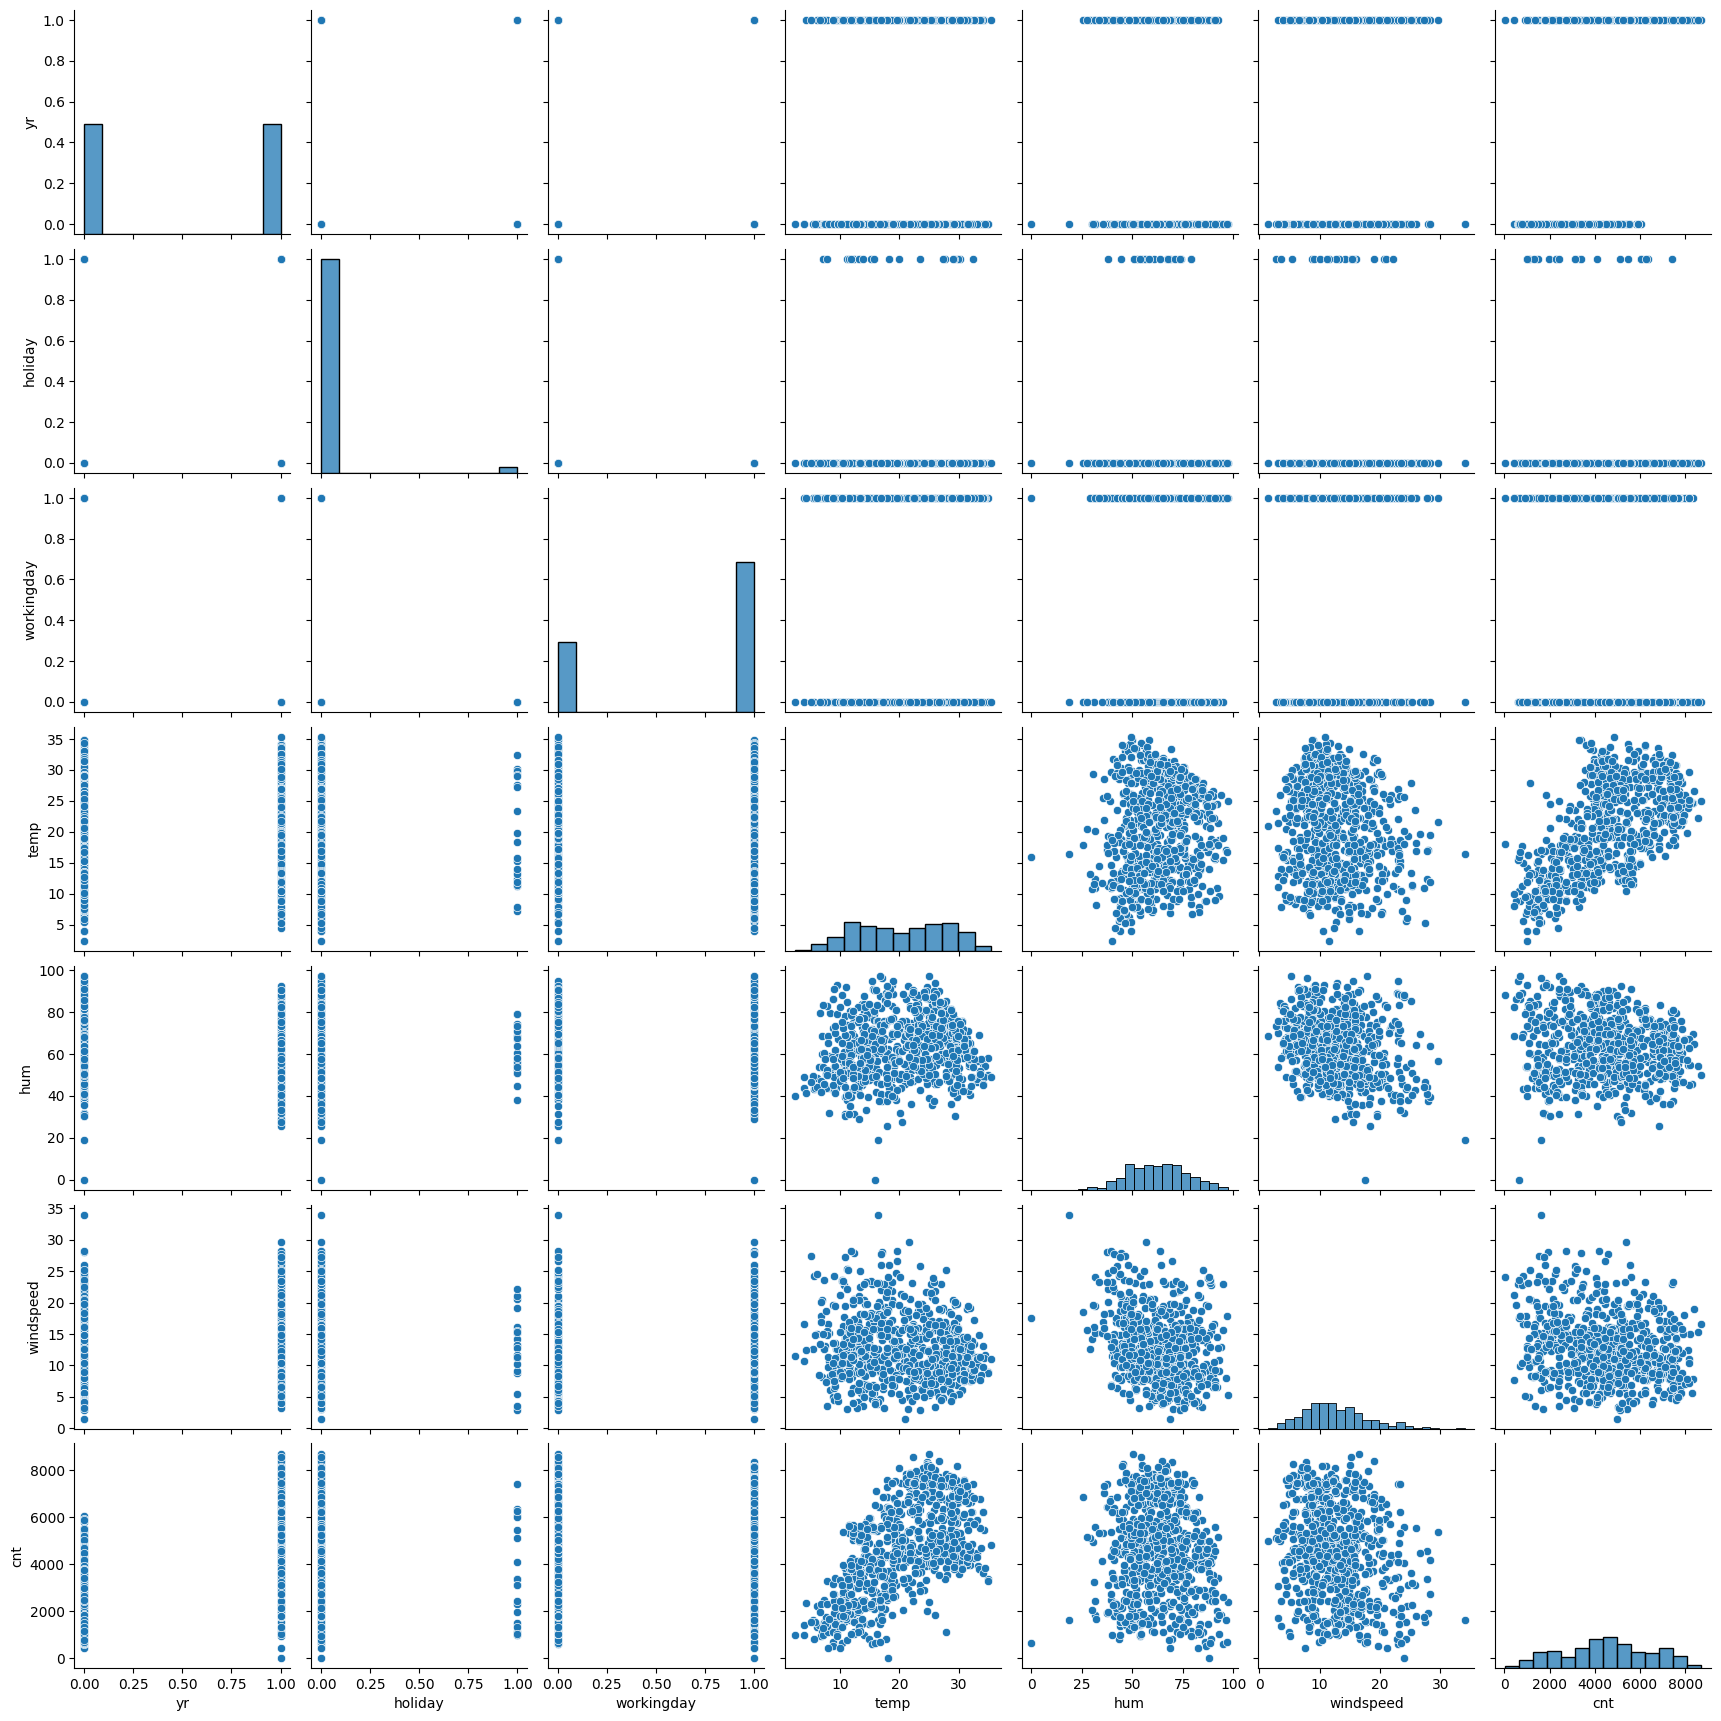

In [22]:
#visualizing numerical  Data
sns.pairplot(bikedf)
plt.show()

#From the plot above we can see Temp seems to have some linear relation with CNT(total count) Hence we can build linear regression model

<Axes: xlabel='temperature_category', ylabel='cnt'>

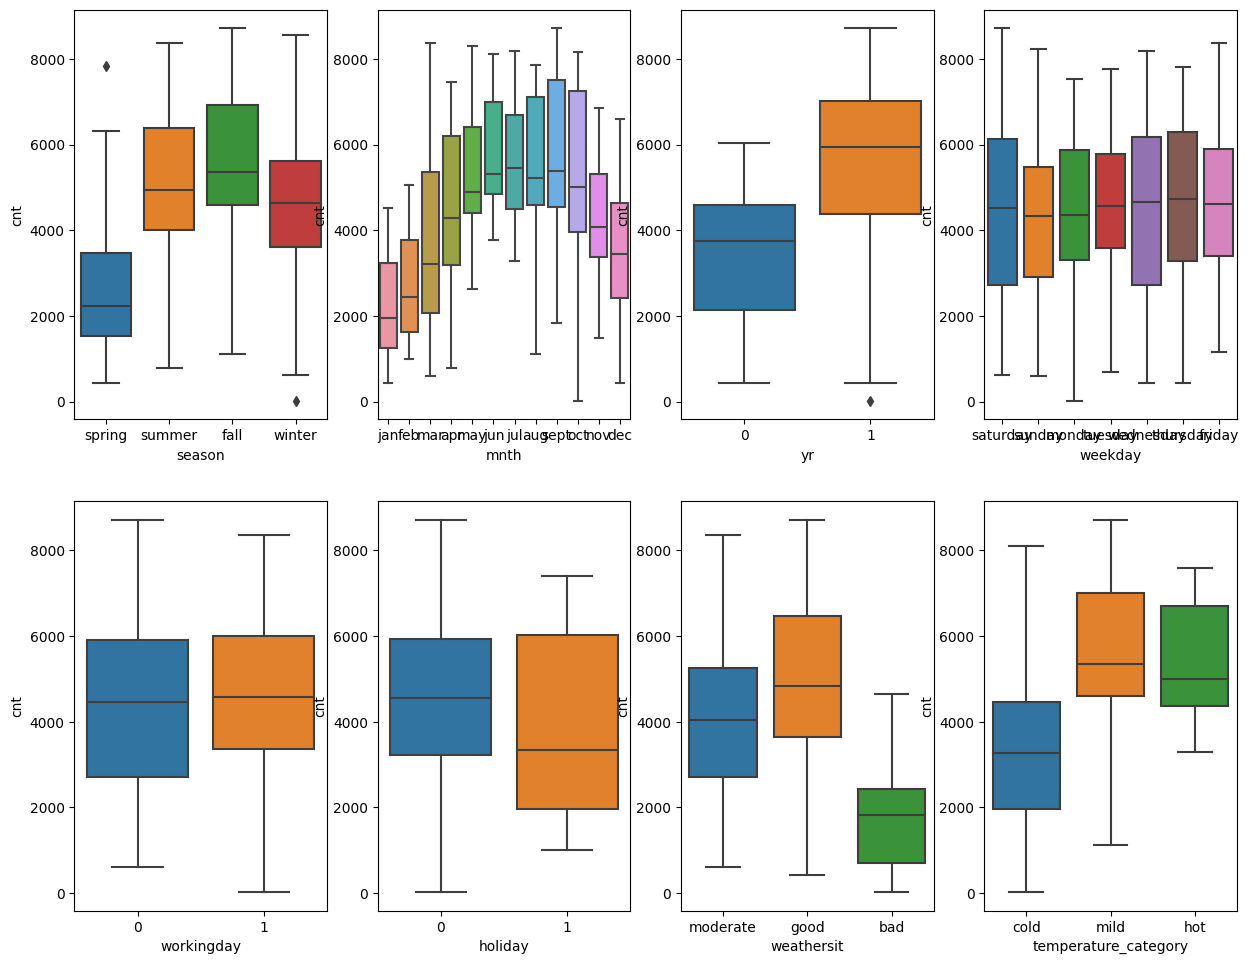

In [23]:
#visualzaing categorical Variable
plt.figure(figsize=[15,50])
plt.subplot(8,4,1)
sns.boxplot(x='season',y='cnt', data=bikedf)
plt.subplot(8,4,2)
sns.boxplot(x='mnth',y='cnt', data=bikedf)
plt.subplot(8,4,3)
sns.boxplot(x='yr',y='cnt', data=bikedf)
plt.subplot(8,4,4)
sns.boxplot(x='weekday',y='cnt', data=bikedf)
plt.subplot(8,4,5)
sns.boxplot(x='workingday',y='cnt', data=bikedf)
plt.subplot(8,4,6)
sns.boxplot(x='holiday',y='cnt', data=bikedf)
plt.subplot(8,4,7)
sns.boxplot(x='weathersit',y='cnt', data=bikedf)
plt.subplot(8,4,8)
sns.boxplot(x='temperature_category',y='cnt', data=bikedf)

#Deductions from the above boxcharts

1) Spring season have lowest count

2) Lowest count of bike ride happens in month of January, best months for buisness lies between March to october

3)Bike counts increased considerably in 2019 as compared to 2018


4)As expected count of back rides are too much impacted with bad weather

5) From the new temperature category that we created we can deduce that cold weather have lowest bike ride



<ipython-input-24-7a142d5d3198>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bikecor=bikedf.corr()


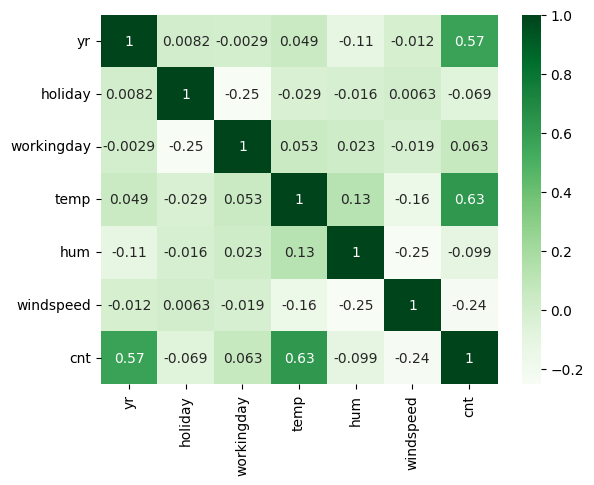

In [24]:
bikecor=bikedf.corr()
sns.heatmap(bikecor, cmap="Greens", annot = True)
plt.show()

In [25]:
#preparing data for test model
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,temperature_category
0,spring,0,jan,0,saturday,0,moderate,14.110847,80.5833,10.749882,985,cold
1,spring,0,jan,0,sunday,0,moderate,14.902598,69.6087,16.652113,801,cold
2,spring,0,jan,0,monday,1,good,8.050924,43.7273,16.636703,1349,cold
3,spring,0,jan,0,tuesday,1,good,8.200000,59.0435,10.739832,1562,cold
4,spring,0,jan,0,wednesday,1,good,9.305237,43.6957,12.522300,1600,cold


In [26]:
#creating dummy variables
mnth = pd.get_dummies(bikedf['mnth'])
mnth.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
season = pd.get_dummies(bikedf['season'])
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [28]:
# Select non-numeric columns
non_numeric_cols = ['season', 'mnth','temperature_category' , 'weathersit','weekday']

# Create dummy variables for non-numeric columns
dummy_variables = pd.get_dummies(bikedf[non_numeric_cols], drop_first=True)

# Concatenate the dummy variables with the original dataframe
bikedf_dummy = pd.concat([bikedf.drop(non_numeric_cols, axis=1), dummy_variables], axis=1)

# Display the updated dataframe
print(bikedf_dummy.head())


   yr  holiday  workingday       temp      hum  windspeed   cnt  \
0   0        0           0  14.110847  80.5833  10.749882   985   
1   0        0           0  14.902598  69.6087  16.652113   801   
2   0        0           1   8.050924  43.7273  16.636703  1349   
3   0        0           1   8.200000  59.0435  10.739832  1562   
4   0        0           1   9.305237  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  ...  \
0              1              0              0  ...   
1              1              0              0  ...   
2              1              0              0  ...   
3              1              0              0  ...   
4              1              0              0  ...   

   temperature_category_mild  temperature_category_hot  weathersit_good  \
0                          0                         0                0   
1                          0                         0                0   
2                          0             

In [29]:
bikedf=bikedf_dummy

In [30]:
bikedf.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
bikedf_dummy.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.410959,0.098630,0.634247,0.336986,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.492345,0.298369,0.481971,0.473004,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
bikedf.shape

(730, 31)

##Model Building

In [210]:
#splitting the df into test and train data
bikedf_train, bikedf_test = train_test_split(bikedf, train_size=0.7, random_state=100)
print(bikedf_train.shape)
print(bikedf_test.shape)

(510, 31)
(220, 31)


Scaling the numeric data

In [211]:
scaler = MinMaxScaler()
#create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']
#fiting same on data
bikedf_train[num_vars] = scaler.fit_transform(bikedf_train[num_vars])
bikedf_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,1,0,1,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Training the model

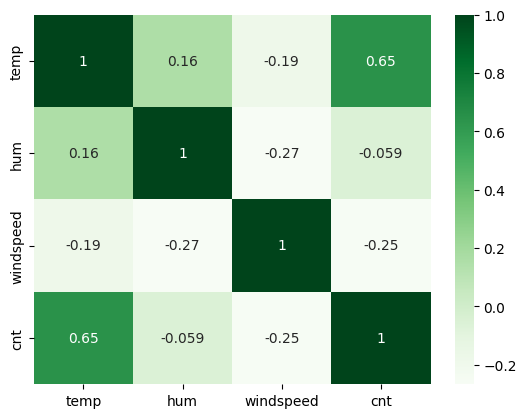

In [126]:
#heatmap
sns.heatmap(bikedf_train[num_vars].corr(), cmap="Greens", annot = True)
plt.show()

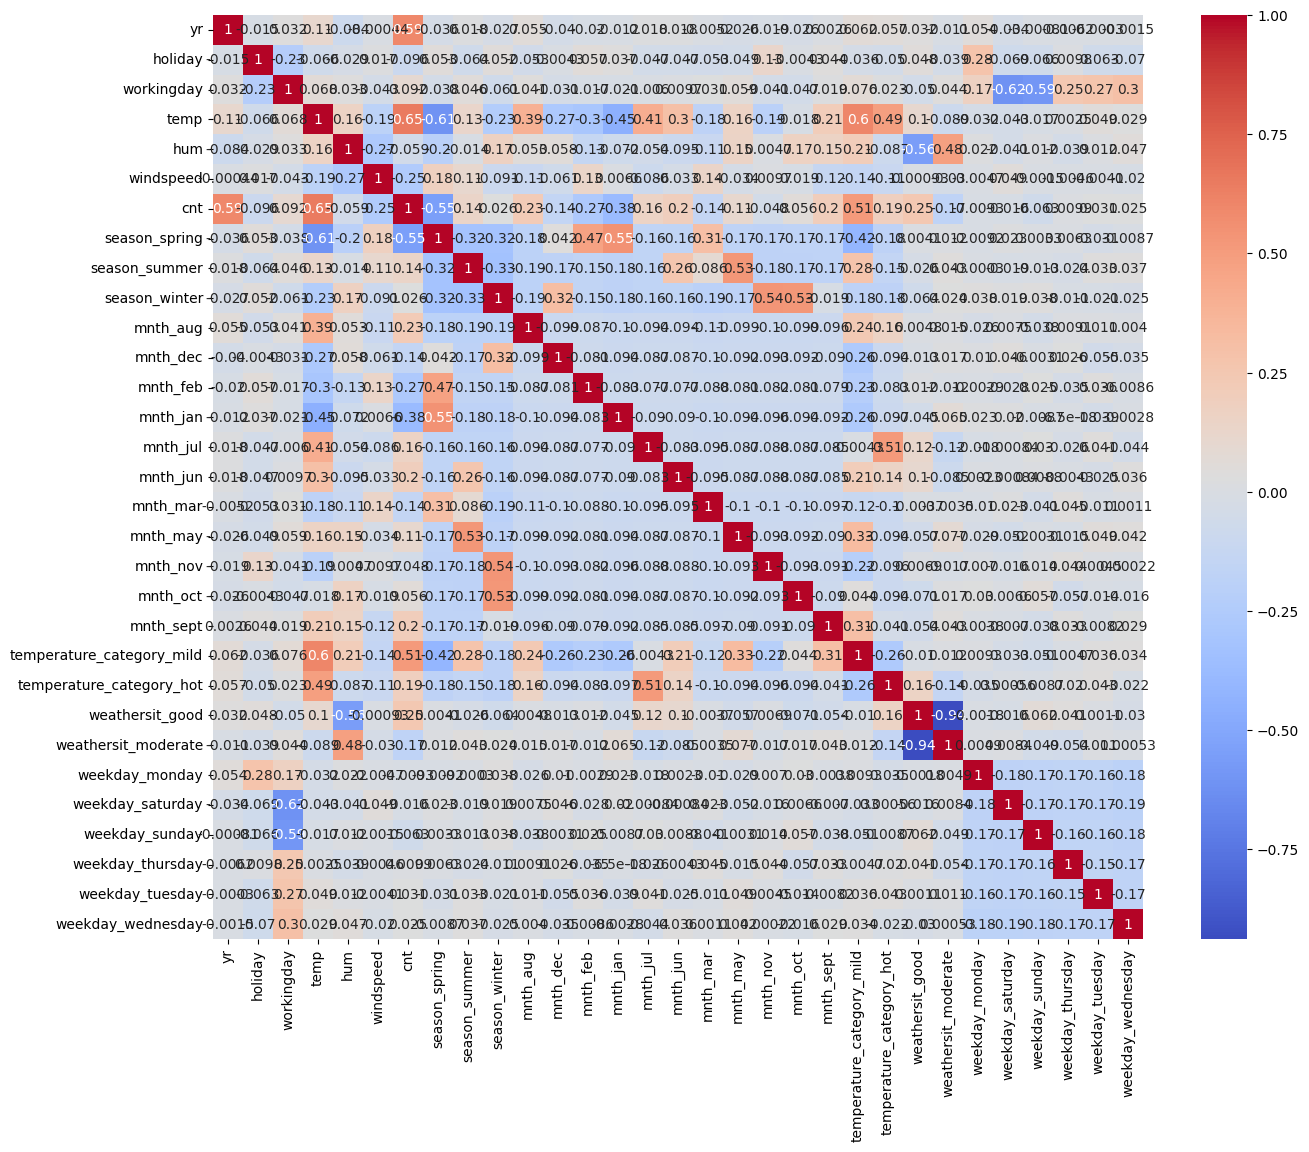

In [127]:
# Create the correlation matrix
corr_matrix = bikedf_train.corr()

# Set the figure size
plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [128]:
# Extract the upper triangular part of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the highest correlations
highest_corr = upper_tri.unstack().sort_values(ascending=False)

# Display the top n correlations
n = 10  # Change this value as desired
top_corr = highest_corr[:n]
print(top_corr)


cnt                        temp             0.645048
temperature_category_mild  temp             0.601769
cnt                        yr               0.591433
mnth_jan                   season_spring    0.548861
mnth_nov                   season_winter    0.536431
mnth_may                   season_summer    0.529732
mnth_oct                   season_winter    0.529732
temperature_category_mild  cnt              0.509864
temperature_category_hot   mnth_jul         0.508789
                           temp             0.486396
dtype: float64


In [129]:
# Find the correlations with 'cnt' column
cnt_corr = corr_matrix['cnt'].sort_values(ascending=False)

# Display the top n correlations
n = 10  # Change this value as desired
top_corr = cnt_corr[1:n+1]  # Exclude the correlation of 'cnt' with itself
print(top_corr)


temp                         0.645048
yr                           0.591433
temperature_category_mild    0.509864
weathersit_good              0.245832
mnth_aug                     0.227578
mnth_sept                    0.201639
mnth_jun                     0.195411
temperature_category_hot     0.185234
mnth_jul                     0.158087
season_summer                0.140259
Name: cnt, dtype: float64


From above we can see cnt has highest corelation with temperature, Year and temperature category is mild i.e 20 to 30, and weather sit is good

In [130]:
#Xtrain, Ytrain
ytrain = bikedf_train.pop('cnt')
xtrain = bikedf_train
xtrain.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
xtrain.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#Model 1 created with  using only temperature since it seems to be most realted to count

In [132]:
# add a constatnt
x_train_sm = sm.add_constant(xtrain['temp'])

#creating the first model

lr = sm.OLS(ytrain, x_train_sm)

#fit the model

lr_model = lr.fit()

#parameters

lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [133]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.46e-61
Time:                        10:07:20   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model 2 with adding windspeed with temperature

In [134]:

# Add a constant
x_train_sm1 = sm.add_constant(xtrain[['temp','yr']])
# Create the first model
lr = sm.OLS(ytrain, x_train_sm1)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.34e-130
Time:                        10:07:34   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model 3 adding temperature category as mild

In [135]:
# Add a constant
x_train_sm1 = sm.add_constant(xtrain[['temp','yr','temperature_category_mild']])
# Create the first model
lr = sm.OLS(ytrain, x_train_sm1)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     423.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.41e-137
Time:                        10:07:40   Log-Likelihood:                 359.25
No. Observations:                 510   AIC:                            -710.5
Df Residuals:                     506   BIC:                            -693.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1046      0.015      7.044      0.000       0.075       0.134
temp                          0.4688      0.030     15.822      0.000       0.411       0.527
yr                            0.2370      0.011     22.147      0.000       0.216       0.258
temperature_category_mild     0.0878      0.014      6.500      0.000       0.061       0.114
==============================================================================
Omnibus:                       39.875   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.643
Skew:                          -0.574   Prob(JB):                     1.84e-13
Kurtosis:                       4.200   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model 4 temp , year, temperature category mild, weather sit

In [136]:
# Add a constant
x_train_sm1 = sm.add_constant(xtrain[['temp','yr','temperature_category_mild','weathersit_good']])
# Create the first model
lr = sm.OLS(ytrain, x_train_sm1)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     377.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.04e-150
Time:                        10:07:43   Log-Likelihood:                 391.89
No. Observations:                 510   AIC:                            -773.8
Df Residuals:                     505   BIC:                            -752.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0639      0.015      4.325      0.000       0.035       0.093
temp                          0.4382      0.028     15.617      0.000       0.383       0.493
yr                            0.2352      0.010     23.403      0.000       0.215       0.255
temperature_category_mild     0.0972      0.013      7.633      0.000       0.072       0.122
weathersit_good               0.0865      0.010      8.304      0.000       0.066       0.107
==============================================================================
Omnibus:                       24.143   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.671
Skew:                          -0.411   Prob(JB):                     8.04e-08
Kurtosis:                       3.929   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model 5 adding all the variables

In [137]:
bikedf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'temperature_category_mild', 'temperature_category_hot',
       'weathersit_good', 'weathersit_moderate', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [138]:
# Add a constant
x_train_sm1 = sm.add_constant(xtrain)
lr = sm.OLS(ytrain, x_train_sm1)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.05e-190
Time:                        10:07:49   Log-Likelihood:                 553.47
No. Observations:                 510   AIC:                            -1047.
Df Residuals:                     480   BIC:                            -919.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0689      0.042      1.644      0.101      -0.013       0.151
yr                            0.2313      0.008     30.135      0.000       0.216       0.246
holiday                      -0.0370      0.024     -1.552      0.121      -0.084       0.010
workingday                    0.0522      0.013      3.971      0.000       0.026       0.078
temp                          0.4249      0.055      7.679      0.000       0.316       0.534
hum                          -0.1726      0.037     -4.680      0.000      -0.245      -0.100
windspeed                    -0.1858      0.025     -7.558      0.000      -0.234      -0.137
season_spring                -0.0734      0.029     -2.550      0.011      -0.130      -0.017
season_summer                 0.0065      0.025      0.255      0.799      -0.043       0.056
season_winter                 0.0885      0.027      3.313      0.001       0.036       0.141
mnth_aug                     -0.0226      0.033     -0.694      0.488      -0.087       0.041
mnth_dec                     -0.0403      0.032     -1.259      0.209      -0.103       0.023
mnth_feb                     -0.0248      0.031     -0.789      0.431      -0.086       0.037
mnth_jan                     -0.0565      0.032     -1.754      0.080      -0.120       0.007
mnth_jul                     -0.0392      0.034     -1.169      0.243      -0.105       0.027
mnth_jun                     -0.0163      0.024     -0.682      0.496      -0.063       0.031
mnth_mar                      0.0009      0.023      0.039      0.969      -0.045       0.047
mnth_may                     -0.0046      0.021     -0.219      0.827      -0.046       0.037
mnth_nov                     -0.0417      0.035     -1.205      0.229      -0.110       0.026
mnth_oct                     -0.0145      0.034     -0.422      0.673      -0.082       0.053
mnth_sept                     0.0294      0.032      0.932      0.352      -0.033       0.092
temperature_category_mild     0.0576      0.018      3.227      0.001       0.023       0.093
temperature_category_hot     -0.0447      0.027     -1.629      0.104      -0.099       0.009
weathersit_good               0.2561      0.025     10.203      0.000       0.207       0.305
weathersit_moderate           0.1983      0.024      8.332      0.000       0.152       0.245
weekday_monday               -0.0220      0.015     -1.508      0.132      -0.051       0.007
weekday_saturday              0.0533      0.014      3.757      0.000       0.025       0.081
weekday_sunday                0.0004      0.015      0.025      0.980      -0.029       0.030
weekday_thursday             -0.0078      0.015     -0.525      0.600      -0.037       0.021
weekday_tuesday              -0.0167      0.015     -1.130      0.259      

#VIF

In [140]:
vif = pd.DataFrame()
vif['Features'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,132.55
25,weekday_saturday,30.12
26,weekday_sunday,28.70
3,temp,11.20
6,season_spring,10.95
22,weathersit_good,10.60
8,season_winter,9.54
23,weathersit_moderate,9.19
7,season_summer,8.61
17,mnth_nov,6.79


In [141]:
#Removing values with high VIF, High P values weekday_sunday
x = xtrain.drop('weekday_sunday', axis=1)

#Model 6

In [142]:
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.05e-190
Time:                        10:09:14   Log-Likelihood:                 553.47
No. Observations:                 510   AIC:                            -1047.
Df Residuals:                     480   BIC:                            -919.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0693      0.053      1.311      0.191      -0.035       0.173
yr                            0.2313      0.008     30.135      0.000       0.216       0.246
holiday                      -0.0374      0.029     -1.299      0.195      -0.094       0.019
workingday                    0.0519      0.015      3.561      0.000       0.023       0.080
temp                          0.4249      0.055      7.679      0.000       0.316       0.534
hum                          -0.1726      0.037     -4.680      0.000      -0.245      -0.100
windspeed                    -0.1858      0.025     -7.558      0.000      -0.234      -0.137
season_spring                -0.0734      0.029     -2.550      0.011      -0.130      -0.017
season_summer                 0.0065      0.025      0.255      0.799      -0.043       0.056
season_winter                 0.0885      0.027      3.313      0.001       0.036       0.141
mnth_aug                     -0.0226      0.033     -0.694      0.488      -0.087       0.041
mnth_dec                     -0.0403      0.032     -1.259      0.209      -0.103       0.023
mnth_feb                     -0.0248      0.031     -0.789      0.431      -0.086       0.037
mnth_jan                     -0.0565      0.032     -1.754      0.080      -0.120       0.007
mnth_jul                     -0.0392      0.034     -1.169      0.243      -0.105       0.027
mnth_jun                     -0.0163      0.024     -0.682      0.496      -0.063       0.031
mnth_mar                      0.0009      0.023      0.039      0.969      -0.045       0.047
mnth_may                     -0.0046      0.021     -0.219      0.827      -0.046       0.037
mnth_nov                     -0.0417      0.035     -1.205      0.229      -0.110       0.026
mnth_oct                     -0.0145      0.034     -0.422      0.673      -0.082       0.053
mnth_sept                     0.0294      0.032      0.932      0.352      -0.033       0.092
temperature_category_mild     0.0576      0.018      3.227      0.001       0.023       0.093
temperature_category_hot     -0.0447      0.027     -1.629      0.104      -0.099       0.009
weathersit_good               0.2561      0.025     10.203      0.000       0.207       0.305
weathersit_moderate           0.1983      0.024      8.332      0.000       0.152       0.245
weekday_monday               -0.0220      0.015     -1.508      0.132      -0.051       0.007
weekday_saturday              0.0529      0.014      3.818      0.000       0.026       0.080
weekday_thursday             -0.0078      0.015     -0.525      0.600      -0.037       0.021
weekday_tuesday              -0.0167      0.015     -1.130      0.259      -0.046       0.012
weekday_wednesday            -0.0039      0.014     -0.274      0.784      

In [149]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,184.49
4,temp,10.92
22,weathersit_good,10.60
7,season_spring,9.86
9,season_winter,9.21
23,weathersit_moderate,9.19
8,season_summer,8.29
10,mnth_aug,5.88
20,temperature_category_mild,5.55
14,mnth_jul,5.16


#Model 7

In [150]:
#Removing values with high VIF, High P values mnth_mar
x = x.drop('mnth_mar', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

KeyError: ignored

In [151]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,184.49
4,temp,10.92
22,weathersit_good,10.60
7,season_spring,9.86
9,season_winter,9.21
23,weathersit_moderate,9.19
8,season_summer,8.29
10,mnth_aug,5.88
20,temperature_category_mild,5.55
14,mnth_jul,5.16


#Model 8

In [152]:
#Removing values with high VIF, High P values season_summer
x = x.drop('season_summer', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.37e-192
Time:                        10:21:43   Log-Likelihood:                 553.43
No. Observations:                 510   AIC:                            -1051.
Df Residuals:                     482   BIC:                            -932.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0756      0.045      1.671      0.095      -0.013       0.164
yr                            0.2314      0.008     30.213      0.000       0.216       0.246
holiday                      -0.0373      0.029     -1.300      0.194      -0.094       0.019
workingday                    0.0518      0.015      3.565      0.000       0.023       0.080
temp                          0.4231      0.054      7.804      0.000       0.317       0.530
hum                          -0.1720      0.037     -4.696      0.000      -0.244      -0.100
windspeed                    -0.1854      0.024     -7.583      0.000      -0.233      -0.137
season_spring                -0.0784      0.017     -4.554      0.000      -0.112      -0.045
season_winter                 0.0857      0.023      3.675      0.000       0.040       0.131
mnth_aug                     -0.0285      0.022     -1.322      0.187      -0.071       0.014
mnth_dec                     -0.0434      0.023     -1.885      0.060      -0.089       0.002
mnth_feb                     -0.0264      0.021     -1.257      0.210      -0.068       0.015
mnth_jan                     -0.0583      0.021     -2.751      0.006      -0.100      -0.017
mnth_jul                     -0.0447      0.025     -1.819      0.069      -0.093       0.004
mnth_jun                     -0.0181      0.022     -0.830      0.407      -0.061       0.025
mnth_may                     -0.0045      0.020     -0.230      0.818      -0.043       0.034
mnth_nov                     -0.0454      0.027     -1.686      0.092      -0.098       0.007
mnth_oct                     -0.0181      0.027     -0.669      0.504      -0.071       0.035
mnth_sept                     0.0238      0.020      1.168      0.244      -0.016       0.064
temperature_category_mild     0.0580      0.018      3.270      0.001       0.023       0.093
temperature_category_hot     -0.0451      0.027     -1.648      0.100      -0.099       0.009
weathersit_good               0.2564      0.025     10.250      0.000       0.207       0.306
weathersit_moderate           0.1986      0.024      8.374      0.000       0.152       0.245
weekday_monday               -0.0220      0.015     -1.511      0.131      -0.051       0.007
weekday_saturday              0.0530      0.014      3.837      0.000       0.026       0.080
weekday_thursday             -0.0078      0.015     -0.527      0.599      -0.037       0.021
weekday_tuesday              -0.0166      0.015     -1.127      0.260      -0.046       0.012
weekday_wednesday            -0.0038      0.014     -0.268      0.789      -0.032       0.024
==============================================================================
Omnibus:                       84.854   Durbin-Watson:                   2.008
Prob(Omnibu

In [153]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,147.43
4,temp,10.79
21,weathersit_good,10.57
22,weathersit_moderate,9.17
8,season_winter,7.29
19,temperature_category_mild,5.51
20,temperature_category_hot,4.34
16,mnth_nov,4.12
17,mnth_oct,4.05
7,season_spring,3.93


#Model 9

In [155]:
#mnth_may
x = x.drop('mnth_may', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.95e-193
Time:                        10:23:08   Log-Likelihood:                 553.41
No. Observations:                 510   AIC:                            -1053.
Df Residuals:                     483   BIC:                            -938.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0756      0.045      1.675      0.095      -0.013       0.164
yr                            0.2315      0.008     30.396      0.000       0.217       0.247
holiday                      -0.0371      0.029     -1.293      0.197      -0.093       0.019
workingday                    0.0518      0.015      3.573      0.000       0.023       0.080
temp                          0.4214      0.054      7.855      0.000       0.316       0.527
hum                          -0.1724      0.037     -4.721      0.000      -0.244      -0.101
windspeed                    -0.1851      0.024     -7.590      0.000      -0.233      -0.137
season_spring                -0.0774      0.017     -4.649      0.000      -0.110      -0.045
season_winter                 0.0863      0.023      3.730      0.000       0.041       0.132
mnth_aug                     -0.0257      0.018     -1.445      0.149      -0.061       0.009
mnth_dec                     -0.0433      0.023     -1.883      0.060      -0.088       0.002
mnth_feb                     -0.0268      0.021     -1.277      0.202      -0.068       0.014
mnth_jan                     -0.0587      0.021     -2.784      0.006      -0.100      -0.017
mnth_jul                     -0.0419      0.021     -1.966      0.050      -0.084   -1.51e-05
mnth_jun                     -0.0154      0.018     -0.839      0.402      -0.052       0.021
mnth_nov                     -0.0450      0.027     -1.678      0.094      -0.098       0.008
mnth_oct                     -0.0169      0.027     -0.639      0.523      -0.069       0.035
mnth_sept                     0.0263      0.017      1.525      0.128      -0.008       0.060
temperature_category_mild     0.0568      0.017      3.354      0.001       0.024       0.090
temperature_category_hot     -0.0461      0.027     -1.711      0.088      -0.099       0.007
weathersit_good               0.2561      0.025     10.260      0.000       0.207       0.305
weathersit_moderate           0.1983      0.024      8.382      0.000       0.152       0.245
weekday_monday               -0.0219      0.015     -1.507      0.133      -0.051       0.007
weekday_saturday              0.0531      0.014      3.850      0.000       0.026       0.080
weekday_thursday             -0.0077      0.015     -0.522      0.602      -0.037       0.021
weekday_tuesday              -0.0166      0.015     -1.127      0.260      -0.046       0.012
weekday_wednesday            -0.0038      0.014     -0.271      0.787      -0.032       0.024
==============================================================================
Omnibus:                       85.419   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.021
Skew:                     

In [156]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,147.42
4,temp,10.59
20,weathersit_good,10.55
21,weathersit_moderate,9.14
8,season_winter,7.19
18,temperature_category_mild,5.03
19,temperature_category_hot,4.22
15,mnth_nov,4.11
16,mnth_oct,3.92
7,season_spring,3.68


#Model 10

In [157]:
#weekday_wednesday

x = x.drop('weekday_wednesday', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.52e-194
Time:                        10:27:29   Log-Likelihood:                 553.37
No. Observations:                 510   AIC:                            -1055.
Df Residuals:                     484   BIC:                            -944.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0755      0.045      1.674      0.095      -0.013       0.164
yr                            0.2315      0.008     30.424      0.000       0.217       0.246
holiday                      -0.0390      0.028     -1.404      0.161      -0.094       0.016
workingday                    0.0497      0.012      4.082      0.000       0.026       0.074
temp                          0.4211      0.054      7.859      0.000       0.316       0.526
hum                          -0.1729      0.036     -4.743      0.000      -0.245      -0.101
windspeed                    -0.1851      0.024     -7.597      0.000      -0.233      -0.137
season_spring                -0.0774      0.017     -4.654      0.000      -0.110      -0.045
season_winter                 0.0863      0.023      3.734      0.000       0.041       0.132
mnth_aug                     -0.0256      0.018     -1.440      0.151      -0.060       0.009
mnth_dec                     -0.0431      0.023     -1.880      0.061      -0.088       0.002
mnth_feb                     -0.0267      0.021     -1.276      0.203      -0.068       0.014
mnth_jan                     -0.0587      0.021     -2.787      0.006      -0.100      -0.017
mnth_jul                     -0.0416      0.021     -1.957      0.051      -0.083       0.000
mnth_jun                     -0.0155      0.018     -0.844      0.399      -0.052       0.021
mnth_nov                     -0.0451      0.027     -1.683      0.093      -0.098       0.008
mnth_oct                     -0.0168      0.026     -0.635      0.526      -0.069       0.035
mnth_sept                     0.0263      0.017      1.526      0.128      -0.008       0.060
temperature_category_mild     0.0568      0.017      3.363      0.001       0.024       0.090
temperature_category_hot     -0.0460      0.027     -1.709      0.088      -0.099       0.007
weathersit_good               0.2566      0.025     10.310      0.000       0.208       0.305
weathersit_moderate           0.1989      0.024      8.457      0.000       0.153       0.245
weekday_monday               -0.0198      0.012     -1.612      0.108      -0.044       0.004
weekday_saturday              0.0531      0.014      3.853      0.000       0.026       0.080
weekday_thursday             -0.0056      0.012     -0.447      0.655      -0.030       0.019
weekday_tuesday              -0.0145      0.012     -1.161      0.246      -0.039       0.010
==============================================================================
Omnibus:                       85.037   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.303
Skew:                          -0.810   Prob(JB):                     4.87e-52
Kurtosis:                       5.915   C

In [160]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,147.40
4,temp,10.56
19,weathersit_good,10.47
20,weathersit_moderate,9.00
17,temperature_category_mild,5.03
18,temperature_category_hot,4.22
7,season_spring,3.53
12,mnth_jan,2.50
8,season_winter,2.48
3,workingday,2.35


#Model 11

In [161]:
x = x.drop('mnth_oct', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

KeyError: ignored

In [162]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,147.40
4,temp,10.56
19,weathersit_good,10.47
20,weathersit_moderate,9.00
17,temperature_category_mild,5.03
18,temperature_category_hot,4.22
7,season_spring,3.53
12,mnth_jan,2.50
8,season_winter,2.48
3,workingday,2.35


#Model 12

In [163]:
x = x.drop('mnth_feb', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.96e-196
Time:                        10:31:12   Log-Likelihood:                 552.43
No. Observations:                 510   AIC:                            -1057.
Df Residuals:                     486   BIC:                            -955.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0697      0.045      1.554      0.121      -0.018       0.158
yr                            0.2315      0.008     30.474      0.000       0.217       0.246
holiday                      -0.0420      0.028     -1.518      0.130      -0.096       0.012
workingday                    0.0500      0.012      4.110      0.000       0.026       0.074
temp                          0.4334      0.052      8.305      0.000       0.331       0.536
hum                          -0.1766      0.036     -4.861      0.000      -0.248      -0.105
windspeed                    -0.1850      0.024     -7.599      0.000      -0.233      -0.137
season_spring                -0.0882      0.014     -6.086      0.000      -0.117      -0.060
season_winter                 0.0735      0.014      5.426      0.000       0.047       0.100
mnth_aug                     -0.0273      0.017     -1.563      0.119      -0.062       0.007
mnth_dec                     -0.0274      0.017     -1.657      0.098      -0.060       0.005
mnth_jan                     -0.0430      0.017     -2.478      0.014      -0.077      -0.009
mnth_jul                     -0.0435      0.021     -2.073      0.039      -0.085      -0.002
mnth_jun                     -0.0171      0.018     -0.940      0.348      -0.053       0.019
mnth_nov                     -0.0293      0.018     -1.650      0.100      -0.064       0.006
mnth_sept                     0.0287      0.016      1.777      0.076      -0.003       0.060
temperature_category_mild     0.0567      0.017      3.357      0.001       0.024       0.090
temperature_category_hot     -0.0478      0.027     -1.780      0.076      -0.101       0.005
weathersit_good               0.2567      0.025     10.340      0.000       0.208       0.305
weathersit_moderate           0.1994      0.023      8.507      0.000       0.153       0.246
weekday_monday               -0.0195      0.012     -1.588      0.113      -0.044       0.005
weekday_saturday              0.0540      0.014      3.924      0.000       0.027       0.081
weekday_thursday             -0.0051      0.012     -0.412      0.681      -0.029       0.019
weekday_tuesday              -0.0148      0.012     -1.185      0.236      -0.039       0.010
==============================================================================
Omnibus:                       83.553   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.697
Skew:                          -0.794   Prob(JB):                     1.79e-51
Kurtosis:                       5.912   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [164]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,145.76
18,weathersit_good,10.46
4,temp,10.04
19,weathersit_moderate,9.00
16,temperature_category_mild,5.03
17,temperature_category_hot,4.21
7,season_spring,2.80
8,season_winter,2.47
3,workingday,2.35
12,mnth_jul,2.25


#Model 13

In [165]:
x = x.drop('weekday_thursday', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.14e-197
Time:                        10:32:33   Log-Likelihood:                 552.34
No. Observations:                 510   AIC:                            -1059.
Df Residuals:                     487   BIC:                            -961.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0693      0.045      1.546      0.123      -0.019       0.157
yr                            0.2315      0.008     30.500      0.000       0.217       0.246
holiday                      -0.0439      0.027     -1.613      0.107      -0.097       0.010
workingday                    0.0484      0.012      4.202      0.000       0.026       0.071
temp                          0.4338      0.052      8.321      0.000       0.331       0.536
hum                          -0.1764      0.036     -4.860      0.000      -0.248      -0.105
windspeed                    -0.1851      0.024     -7.609      0.000      -0.233      -0.137
season_spring                -0.0882      0.014     -6.090      0.000      -0.117      -0.060
season_winter                 0.0736      0.014      5.443      0.000       0.047       0.100
mnth_aug                     -0.0273      0.017     -1.563      0.119      -0.062       0.007
mnth_dec                     -0.0278      0.017     -1.682      0.093      -0.060       0.005
mnth_jan                     -0.0431      0.017     -2.484      0.013      -0.077      -0.009
mnth_jul                     -0.0433      0.021     -2.066      0.039      -0.084      -0.002
mnth_jun                     -0.0170      0.018     -0.935      0.350      -0.053       0.019
mnth_nov                     -0.0298      0.018     -1.681      0.093      -0.065       0.005
mnth_sept                     0.0286      0.016      1.772      0.077      -0.003       0.060
temperature_category_mild     0.0565      0.017      3.348      0.001       0.023       0.090
temperature_category_hot     -0.0483      0.027     -1.802      0.072      -0.101       0.004
weathersit_good               0.2569      0.025     10.358      0.000       0.208       0.306
weathersit_moderate           0.1998      0.023      8.536      0.000       0.154       0.246
weekday_monday               -0.0179      0.012     -1.540      0.124      -0.041       0.005
weekday_saturday              0.0541      0.014      3.929      0.000       0.027       0.081
weekday_tuesday              -0.0132      0.012     -1.113      0.266      -0.036       0.010
==============================================================================
Omnibus:                       84.154   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.418
Skew:                          -0.798   Prob(JB):                     4.60e-52
Kurtosis:                       5.929   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,145.69
18,weathersit_good,10.45
4,temp,10.04
19,weathersit_moderate,8.98
16,temperature_category_mild,5.03
17,temperature_category_hot,4.20
7,season_spring,2.80
8,season_winter,2.47
12,mnth_jul,2.25
3,workingday,2.11


#Model 14

In [167]:
x = x.drop('mnth_jun', axis=1)
# Build another model
xtrain_sm1 = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          8.86e-198
Time:                        10:35:19   Log-Likelihood:                 551.88
No. Observations:                 510   AIC:                            -1060.
Df Residuals:                     488   BIC:                            -966.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0683      0.045      1.526      0.128      -0.020       0.156
yr                            0.2319      0.008     30.632      0.000       0.217       0.247
holiday                      -0.0424      0.027     -1.561      0.119      -0.096       0.011
workingday                    0.0488      0.012      4.239      0.000       0.026       0.071
temp                          0.4176      0.049      8.494      0.000       0.321       0.514
hum                          -0.1700      0.036     -4.770      0.000      -0.240      -0.100
windspeed                    -0.1831      0.024     -7.557      0.000      -0.231      -0.135
season_spring                -0.0876      0.014     -6.056      0.000      -0.116      -0.059
season_winter                 0.0757      0.013      5.675      0.000       0.050       0.102
mnth_aug                     -0.0195      0.015     -1.270      0.205      -0.050       0.011
mnth_dec                     -0.0295      0.016     -1.798      0.073      -0.062       0.003
mnth_jan                     -0.0455      0.017     -2.649      0.008      -0.079      -0.012
mnth_jul                     -0.0339      0.018     -1.844      0.066      -0.070       0.002
mnth_nov                     -0.0310      0.018     -1.757      0.080      -0.066       0.004
mnth_sept                     0.0338      0.015      2.227      0.026       0.004       0.064
temperature_category_mild     0.0564      0.017      3.342      0.001       0.023       0.090
temperature_category_hot     -0.0496      0.027     -1.850      0.065      -0.102       0.003
weathersit_good               0.2582      0.025     10.429      0.000       0.210       0.307
weathersit_moderate           0.2006      0.023      8.577      0.000       0.155       0.247
weekday_monday               -0.0183      0.012     -1.578      0.115      -0.041       0.004
weekday_saturday              0.0541      0.014      3.930      0.000       0.027       0.081
weekday_tuesday              -0.0129      0.012     -1.091      0.276      -0.036       0.010
==============================================================================
Omnibus:                       84.138   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.045
Skew:                          -0.791   Prob(JB):                     4.55e-53
Kurtosis:                       5.973   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,145.62
17,weathersit_good,10.42
18,weathersit_moderate,8.97
4,temp,8.93
15,temperature_category_mild,5.03
16,temperature_category_hot,4.19
7,season_spring,2.80
8,season_winter,2.40
3,workingday,2.11
5,hum,1.96


#Model 15

In [169]:
x = x.drop('weekday_tuesday', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.26e-198
Time:                        10:36:01   Log-Likelihood:                 551.26
No. Observations:                 510   AIC:                            -1061.
Df Residuals:                     489   BIC:                            -971.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0700      0.045      1.563      0.119      -0.018       0.158
yr                            0.2319      0.008     30.620      0.000       0.217       0.247
holiday                      -0.0449      0.027     -1.658      0.098      -0.098       0.008
workingday                    0.0457      0.011      4.095      0.000       0.024       0.068
temp                          0.4204      0.049      8.562      0.000       0.324       0.517
hum                          -0.1716      0.036     -4.819      0.000      -0.242      -0.102
windspeed                    -0.1837      0.024     -7.584      0.000      -0.231      -0.136
season_spring                -0.0875      0.014     -6.045      0.000      -0.116      -0.059
season_winter                 0.0755      0.013      5.656      0.000       0.049       0.102
mnth_aug                     -0.0195      0.015     -1.274      0.203      -0.050       0.011
mnth_dec                     -0.0285      0.016     -1.739      0.083      -0.061       0.004
mnth_jan                     -0.0446      0.017     -2.604      0.010      -0.078      -0.011
mnth_jul                     -0.0347      0.018     -1.888      0.060      -0.071       0.001
mnth_nov                     -0.0308      0.018     -1.743      0.082      -0.066       0.004
mnth_sept                     0.0342      0.015      2.253      0.025       0.004       0.064
temperature_category_mild     0.0556      0.017      3.296      0.001       0.022       0.089
temperature_category_hot     -0.0509      0.027     -1.904      0.057      -0.104       0.002
weathersit_good               0.2566      0.025     10.380      0.000       0.208       0.305
weathersit_moderate           0.1992      0.023      8.528      0.000       0.153       0.245
weekday_monday               -0.0153      0.011     -1.355      0.176      -0.037       0.007
weekday_saturday              0.0540      0.014      3.923      0.000       0.027       0.081
==============================================================================
Omnibus:                       84.094   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.623
Skew:                          -0.783   Prob(JB):                     2.80e-54
Kurtosis:                       6.025   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model 16

In [170]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,145.45
17,weathersit_good,10.38
18,weathersit_moderate,8.94
4,temp,8.91
15,temperature_category_mild,5.02
16,temperature_category_hot,4.18
7,season_spring,2.80
8,season_winter,2.40
3,workingday,1.97
5,hum,1.95


In [179]:
#x = x.drop('mnth_aug', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     184.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          9.62e-201
Time:                        10:43:28   Log-Likelihood:                 548.21
No. Observations:                 510   AIC:                            -1060.
Df Residuals:                     492   BIC:                            -984.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0746      0.045      1.666      0.096      -0.013       0.163
yr                            0.2319      0.008     30.624      0.000       0.217       0.247
holiday                      -0.0555      0.026     -2.165      0.031      -0.106      -0.005
workingday                    0.0431      0.011      3.940      0.000       0.022       0.065
temp                          0.3900      0.046      8.516      0.000       0.300       0.480
hum                          -0.1677      0.036     -4.717      0.000      -0.238      -0.098
windspeed                    -0.1799      0.024     -7.444      0.000      -0.227      -0.132
season_spring                -0.0872      0.014     -6.016      0.000      -0.116      -0.059
season_winter                 0.0774      0.013      5.830      0.000       0.051       0.104
mnth_dec                     -0.0307      0.016     -1.874      0.061      -0.063       0.001
mnth_jan                     -0.0492      0.017     -2.888      0.004      -0.083      -0.016
mnth_nov                     -0.0312      0.018     -1.766      0.078      -0.066       0.004
mnth_sept                     0.0425      0.015      2.919      0.004       0.014       0.071
temperature_category_mild     0.0582      0.017      3.461      0.001       0.025       0.091
temperature_category_hot     -0.0567      0.026     -2.141      0.033      -0.109      -0.005
weathersit_good               0.2588      0.025     10.467      0.000       0.210       0.307
weathersit_moderate           0.2009      0.023      8.597      0.000       0.155       0.247
weekday_saturday              0.0537      0.014      3.896      0.000       0.027       0.081
==============================================================================
Omnibus:                       83.084   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.055
Skew:                          -0.765   Prob(JB):                     5.03e-55
Kurtosis:                       6.070   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,144.64
16,weathersit_good,10.38
17,weathersit_moderate,8.94
4,temp,8.03
14,temperature_category_mild,4.99
15,temperature_category_hot,4.17
7,season_spring,2.80
8,season_winter,2.37
3,workingday,1.97
5,hum,1.95


#Model 17

In [175]:
#weekday_monday
x = x.drop('weekday_monday', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     174.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.00e-200
Time:                        10:42:15   Log-Likelihood:                 549.46
No. Observations:                 510   AIC:                            -1061.
Df Residuals:                     491   BIC:                            -980.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0750      0.045      1.678      0.094      -0.013       0.163
yr                            0.2313      0.008     30.566      0.000       0.216       0.246
holiday                      -0.0565      0.026     -2.206      0.028      -0.107      -0.006
workingday                    0.0424      0.011      3.874      0.000       0.021       0.064
temp                          0.4041      0.047      8.668      0.000       0.313       0.496
hum                          -0.1713      0.036     -4.814      0.000      -0.241      -0.101
windspeed                    -0.1813      0.024     -7.508      0.000      -0.229      -0.134
season_spring                -0.0867      0.014     -5.988      0.000      -0.115      -0.058
season_winter                 0.0768      0.013      5.789      0.000       0.051       0.103
mnth_dec                     -0.0296      0.016     -1.809      0.071      -0.062       0.003
mnth_jan                     -0.0473      0.017     -2.772      0.006      -0.081      -0.014
mnth_jul                     -0.0265      0.017     -1.555      0.121      -0.060       0.007
mnth_nov                     -0.0305      0.018     -1.731      0.084      -0.065       0.004
mnth_sept                     0.0397      0.015      2.710      0.007       0.011       0.069
temperature_category_mild     0.0566      0.017      3.361      0.001       0.024       0.090
temperature_category_hot     -0.0502      0.027     -1.874      0.062      -0.103       0.002
weathersit_good               0.2565      0.025     10.366      0.000       0.208       0.305
weathersit_moderate           0.1986      0.023      8.494      0.000       0.153       0.245
weekday_saturday              0.0532      0.014      3.865      0.000       0.026       0.080
==============================================================================
Omnibus:                       82.949   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.578
Skew:                          -0.769   Prob(JB):                     4.72e-54
Kurtosis:                       6.031   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,144.61
15,weathersit_good,10.33
16,weathersit_moderate,8.91
4,temp,7.70
13,temperature_category_mild,4.97
14,temperature_category_hot,4.07
7,season_spring,2.79
8,season_winter,2.37
5,hum,1.94
3,workingday,1.89


#Model 18

In [184]:
#mnth_jul
x = x.drop('mnth_jul', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     184.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          9.62e-201
Time:                        10:45:02   Log-Likelihood:                 548.21
No. Observations:                 510   AIC:                            -1060.
Df Residuals:                     492   BIC:                            -984.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0746      0.045      1.666      0.096      -0.013       0.163
yr                            0.2319      0.008     30.624      0.000       0.217       0.247
holiday                      -0.0555      0.026     -2.165      0.031      -0.106      -0.005
workingday                    0.0431      0.011      3.940      0.000       0.022       0.065
temp                          0.3900      0.046      8.516      0.000       0.300       0.480
hum                          -0.1677      0.036     -4.717      0.000      -0.238      -0.098
windspeed                    -0.1799      0.024     -7.444      0.000      -0.227      -0.132
season_spring                -0.0872      0.014     -6.016      0.000      -0.116      -0.059
season_winter                 0.0774      0.013      5.830      0.000       0.051       0.104
mnth_dec                     -0.0307      0.016     -1.874      0.061      -0.063       0.001
mnth_jan                     -0.0492      0.017     -2.888      0.004      -0.083      -0.016
mnth_nov                     -0.0312      0.018     -1.766      0.078      -0.066       0.004
mnth_sept                     0.0425      0.015      2.919      0.004       0.014       0.071
temperature_category_mild     0.0582      0.017      3.461      0.001       0.025       0.091
temperature_category_hot     -0.0567      0.026     -2.141      0.033      -0.109      -0.005
weathersit_good               0.2588      0.025     10.467      0.000       0.210       0.307
weathersit_moderate           0.2009      0.023      8.597      0.000       0.155       0.247
weekday_saturday              0.0537      0.014      3.896      0.000       0.027       0.081
==============================================================================
Omnibus:                       83.084   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.055
Skew:                          -0.765   Prob(JB):                     5.03e-55
Kurtosis:                       6.070   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,144.61
15,weathersit_good,10.33
16,weathersit_moderate,8.91
4,temp,7.70
13,temperature_category_mild,4.97
14,temperature_category_hot,4.07
7,season_spring,2.79
8,season_winter,2.37
5,hum,1.94
3,workingday,1.89


#Model 19

In [187]:
#mnth_nov
x = x.drop('mnth_nov', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.18e-201
Time:                        10:46:55   Log-Likelihood:                 546.60
No. Observations:                 510   AIC:                            -1059.
Df Residuals:                     493   BIC:                            -987.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0719      0.045      1.603      0.110      -0.016       0.160
yr                            0.2318      0.008     30.553      0.000       0.217       0.247
holiday                      -0.0610      0.026     -2.391      0.017      -0.111      -0.011
workingday                    0.0425      0.011      3.875      0.000       0.021       0.064
temp                          0.3923      0.046      8.550      0.000       0.302       0.482
hum                          -0.1677      0.036     -4.706      0.000      -0.238      -0.098
windspeed                    -0.1794      0.024     -7.408      0.000      -0.227      -0.132
season_spring                -0.0845      0.014     -5.851      0.000      -0.113      -0.056
season_winter                 0.0671      0.012      5.616      0.000       0.044       0.091
mnth_dec                     -0.0193      0.015     -1.281      0.201      -0.049       0.010
mnth_jan                     -0.0466      0.017     -2.737      0.006      -0.080      -0.013
mnth_sept                     0.0443      0.015      3.041      0.002       0.016       0.073
temperature_category_mild     0.0631      0.017      3.796      0.000       0.030       0.096
temperature_category_hot     -0.0529      0.026     -2.000      0.046      -0.105      -0.001
weathersit_good               0.2560      0.025     10.352      0.000       0.207       0.305
weathersit_moderate           0.1988      0.023      8.499      0.000       0.153       0.245
weekday_saturday              0.0534      0.014      3.863      0.000       0.026       0.081
==============================================================================
Omnibus:                       79.331   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.818
Skew:                          -0.744   Prob(JB):                     2.05e-50
Kurtosis:                       5.925   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,144.44
14,weathersit_good,10.29
15,weathersit_moderate,8.88
4,temp,7.70
12,temperature_category_mild,4.83
13,temperature_category_hot,4.04
7,season_spring,2.76
5,hum,1.94
8,season_winter,1.91
3,workingday,1.89


#Model 20

In [188]:
#mnth_dec
x = x.drop('mnth_dec', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.91e-202
Time:                        10:47:19   Log-Likelihood:                 545.75
No. Observations:                 510   AIC:                            -1060.
Df Residuals:                     494   BIC:                            -991.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0716      0.045      1.596      0.111      -0.017       0.160
yr                            0.2318      0.008     30.525      0.000       0.217       0.247
holiday                      -0.0605      0.026     -2.369      0.018      -0.111      -0.010
workingday                    0.0420      0.011      3.834      0.000       0.020       0.064
temp                          0.3984      0.046      8.726      0.000       0.309       0.488
hum                          -0.1723      0.035     -4.855      0.000      -0.242      -0.103
windspeed                    -0.1767      0.024     -7.320      0.000      -0.224      -0.129
season_spring                -0.0851      0.014     -5.895      0.000      -0.114      -0.057
season_winter                 0.0647      0.012      5.481      0.000       0.042       0.088
mnth_jan                     -0.0421      0.017     -2.528      0.012      -0.075      -0.009
mnth_sept                     0.0448      0.015      3.075      0.002       0.016       0.073
temperature_category_mild     0.0647      0.017      3.895      0.000       0.032       0.097
temperature_category_hot     -0.0529      0.026     -1.998      0.046      -0.105      -0.001
weathersit_good               0.2532      0.025     10.273      0.000       0.205       0.302
weathersit_moderate           0.1968      0.023      8.427      0.000       0.151       0.243
weekday_saturday              0.0524      0.014      3.797      0.000       0.025       0.080
==============================================================================
Omnibus:                       75.578   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.085
Skew:                          -0.716   Prob(JB):                     5.36e-47
Kurtosis:                       5.824   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,144.44
13,weathersit_good,10.21
14,weathersit_moderate,8.84
4,temp,7.61
11,temperature_category_mild,4.81
12,temperature_category_hot,4.04
7,season_spring,2.75
5,hum,1.92
3,workingday,1.89
8,season_winter,1.86


#Model 21

In [191]:
#dropping temp due to high VIF
x = x.drop('weathersit_good', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.70e-182
Time:                        10:48:22   Log-Likelihood:                 496.38
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     495   BIC:                            -899.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4004      0.035     11.569      0.000       0.332       0.468
yr                            0.2325      0.008     27.828      0.000       0.216       0.249
holiday                      -0.0569      0.028     -2.024      0.043      -0.112      -0.002
workingday                    0.0342      0.012      2.841      0.005       0.011       0.058
temp                          0.4320      0.050      8.619      0.000       0.334       0.530
hum                          -0.3146      0.036     -8.750      0.000      -0.385      -0.244
windspeed                    -0.2237      0.026     -8.578      0.000      -0.275      -0.172
season_spring                -0.0799      0.016     -5.031      0.000      -0.111      -0.049
season_winter                 0.0649      0.013      4.989      0.000       0.039       0.090
mnth_jan                     -0.0356      0.018     -1.940      0.053      -0.072       0.000
mnth_sept                     0.0408      0.016      2.546      0.011       0.009       0.072
temperature_category_mild     0.0653      0.018      3.575      0.000       0.029       0.101
temperature_category_hot     -0.0569      0.029     -1.954      0.051      -0.114       0.000
weathersit_moderate          -0.0233      0.010     -2.279      0.023      -0.043      -0.003
weekday_saturday              0.0427      0.015      2.820      0.005       0.013       0.073
==============================================================================
Omnibus:                      109.698   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.799
Skew:                          -1.028   Prob(JB):                     4.39e-69
Kurtosis:                       6.254   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,70.95
4,temp,7.57
11,temperature_category_mild,4.81
12,temperature_category_hot,4.04
7,season_spring,2.75
3,workingday,1.88
8,season_winter,1.86
14,weekday_saturday,1.78
5,hum,1.63
9,mnth_jan,1.60


#Model 22

In [193]:
#dropping hum due to high vif and P value
x = x.drop('mnth_jan', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.83e-183
Time:                        10:49:08   Log-Likelihood:                 494.45
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     496   BIC:                            -901.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3876      0.034     11.377      0.000       0.321       0.455
yr                            0.2318      0.008     27.694      0.000       0.215       0.248
holiday                      -0.0578      0.028     -2.052      0.041      -0.113      -0.002
workingday                    0.0343      0.012      2.843      0.005       0.011       0.058
temp                          0.4603      0.048      9.572      0.000       0.366       0.555
hum                          -0.3181      0.036     -8.833      0.000      -0.389      -0.247
windspeed                    -0.2182      0.026     -8.392      0.000      -0.269      -0.167
season_spring                -0.0875      0.015     -5.672      0.000      -0.118      -0.057
season_winter                 0.0679      0.013      5.249      0.000       0.042       0.093
mnth_sept                     0.0410      0.016      2.549      0.011       0.009       0.073
temperature_category_mild     0.0594      0.018      3.289      0.001       0.024       0.095
temperature_category_hot     -0.0682      0.029     -2.382      0.018      -0.124      -0.012
weathersit_moderate          -0.0238      0.010     -2.320      0.021      -0.044      -0.004
weekday_saturday              0.0427      0.015      2.808      0.005       0.013       0.073
==============================================================================
Omnibus:                      106.149   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.557
Skew:                          -0.997   Prob(JB):                     2.00e-66
Kurtosis:                       6.203   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,68.35
4,temp,6.93
10,temperature_category_mild,4.68
11,temperature_category_hot,3.88
7,season_spring,2.58
3,workingday,1.88
8,season_winter,1.83
13,weekday_saturday,1.78
5,hum,1.62
12,weathersit_moderate,1.40


#Model 23

In [195]:
#dropping Holiday since the P value is higher than 0.05
x = x.drop('temp', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          8.73e-166
Time:                        10:50:08   Log-Likelihood:                 451.22
No. Observations:                 510   AIC:                            -876.4
Df Residuals:                     497   BIC:                            -821.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5559      0.032     17.519      0.000       0.494       0.618
yr                            0.2380      0.009     26.221      0.000       0.220       0.256
holiday                      -0.0587      0.031     -1.915      0.056      -0.119       0.002
workingday                    0.0284      0.013      2.166      0.031       0.003       0.054
hum                          -0.2655      0.039     -6.862      0.000      -0.342      -0.190
windspeed                    -0.2067      0.028     -7.319      0.000      -0.262      -0.151
season_spring                -0.1568      0.015    -10.575      0.000      -0.186      -0.128
season_winter                 0.0374      0.014      2.741      0.006       0.011       0.064
mnth_sept                     0.0372      0.017      2.131      0.034       0.003       0.072
temperature_category_mild     0.1860      0.013     13.890      0.000       0.160       0.212
temperature_category_hot      0.1414      0.020      7.058      0.000       0.102       0.181
weathersit_moderate          -0.0334      0.011     -3.009      0.003      -0.055      -0.012
weekday_saturday              0.0348      0.016      2.107      0.036       0.002       0.067
==============================================================================
Omnibus:                       72.177   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.888
Skew:                          -0.792   Prob(JB):                     7.70e-33
Kurtosis:                       5.109   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,50.14
9,temperature_category_mild,2.17
6,season_spring,2.02
3,workingday,1.87
12,weekday_saturday,1.78
7,season_winter,1.72
10,temperature_category_hot,1.61
4,hum,1.58
11,weathersit_moderate,1.39
2,holiday,1.16


#Model 24

In [197]:
x = x.drop('holiday', axis=1)
# Build another model
x = sm.add_constant(x)
lr = sm.OLS(ytrain, x)

# Fit the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.90e-166
Time:                        10:50:52   Log-Likelihood:                 449.35
No. Observations:                 510   AIC:                            -874.7
Df Residuals:                     498   BIC:                            -823.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5465      0.031     17.386      0.000       0.485       0.608
yr                            0.2382      0.009     26.177      0.000       0.220       0.256
workingday                    0.0371      0.012      3.013      0.003       0.013       0.061
hum                          -0.2633      0.039     -6.789      0.000      -0.340      -0.187
windspeed                    -0.2071      0.028     -7.314      0.000      -0.263      -0.151
season_spring                -0.1583      0.015    -10.661      0.000      -0.187      -0.129
season_winter                 0.0361      0.014      2.642      0.009       0.009       0.063
mnth_sept                     0.0350      0.017      2.004      0.046       0.001       0.069
temperature_category_mild     0.1858      0.013     13.838      0.000       0.159       0.212
temperature_category_hot      0.1419      0.020      7.063      0.000       0.102       0.181
weathersit_moderate          -0.0332      0.011     -2.989      0.003      -0.055      -0.011
weekday_saturday              0.0436      0.016      2.748      0.006       0.012       0.075
==============================================================================
Omnibus:                       75.274   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.161
Skew:                          -0.813   Prob(JB):                     4.53e-35
Kurtosis:                       5.190   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,48.96
8,temperature_category_mild,2.17
5,season_spring,2.01
6,season_winter,1.72
2,workingday,1.65
11,weekday_saturday,1.64
9,temperature_category_hot,1.61
3,hum,1.58
10,weathersit_moderate,1.39
4,windspeed,1.14


The provided OLS regression model has an R-squared value of 0.800, indicating that approximately 80% of the variability in the target variable 'cnt' can be explained by the model. The adjusted R-squared value of 0.796 suggests that the model is not overfitting.

The p-values for the coefficients indicate that most of the variables in the model are statistically significant predictors of the target variable, as they have p-values less than 0.05.

Regarding the VIF values, the values are relatively low for most of the variables, ranging from 1.03 to 2.17.

**We will pick this model as our final one**

In [218]:
column_names = x.columns.tolist()
column_names

['const',
 'yr',
 'workingday',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_sept',
 'temperature_category_mild',
 'temperature_category_hot',
 'weathersit_moderate',
 'weekday_saturday']

#Residual Analysis

In [200]:
y_train_pred =lr_model.predict(x)

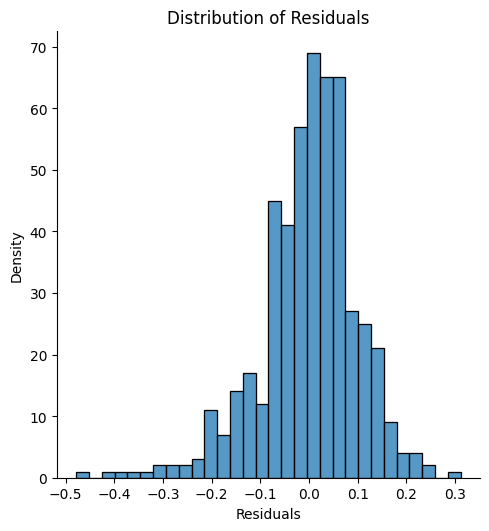

In [206]:
res = ytrain -  y_train_pred
sns.displot(res)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

Errors are normally distribured here with mean 0. So everything seems to be fine

#Evaluvation on Test Set

In [212]:

#create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']
#fiting same on data
bikedf_test[num_vars] = scaler.transform(bikedf_test[num_vars])
bikedf_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,1,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,1,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,1,1,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,1,0,1,0,0,0,0,1,0,0


In [213]:
bikedf_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.395455,0.122727,0.654545,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.490063,0.328872,0.476601,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
y_test = bikedf_test.pop('cnt')
x_test = bikedf_test

In [215]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,temperature_category_mild,temperature_category_hot,weathersit_good,weathersit_moderate,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,1,0,0,1,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,1,1,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,1,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,1,1,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,1,0,1,0,0,0,0,1,0,0


In [225]:
#dropping columns from x_test_sm
x_columns = set(x.columns)
x_test_columns = set(x_test_sm.columns)

# Find the columns that are in x_test_sm but not in x
columns_to_drop = list(x_test_columns - x_columns)

# Drop the columns from x_test_sm
x_test_sm_dropped = x_test_sm.drop(columns=columns_to_drop)


In [226]:
x_test_sm_dropped.head()

,const,yr,workingday,hum,windspeed,season_spring,season_winter,mnth_sept,temperature_category_mild,temperature_category_hot,weathersit_moderate,weekday_saturday
184,1.0,0,0,0.657364,0.084219,0,0,0,1,0,1,0
535,1.0,1,1,0.610133,0.153728,0,0,0,0,1,0,0
299,1.0,0,1,0.837699,0.334206,0,1,0,0,0,1,0
221,1.0,0,1,0.437098,0.339570,0,0,0,0,1,0,0
152,1.0,0,1,0.314298,0.537414,0,0,0,1,0,0,0


In [230]:
#predict
y_test_pred =lr_model.predict(x_test_sm_dropped)

In [233]:
#Evaluvate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8013970231548148

Since the R2 is similar to the one between training and test set we can see, what model learn from training set, it could very well apply on test set

#The Best equation for our best fitted line as per the model is below

#*count = 0.5465 + 0.2382 * yr + 0.0371 * workingday - 0.2633 * hum - 0.2071 * windspeed - 0.1583 * season_spring + 0.0361 * season_winter + 0.0350 * mnth_sept + 0.1858 * temperature_category_mild + 0.1419 * temperature_category_hot - 0.0332 * weathersit_moderate + 0.0436 * weekday_saturday*